<a href="https://colab.research.google.com/github/asif-hanif/Tutorial_Pytroch_LinearLayer/blob/main/diffusers/InstructPix2Pix_using_diffusers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# InstructPix2Pix: Learning to Follow Image Editing Instructions

A demo notebook for [InstructPix2Pix](https://www.timothybrooks.com/instruct-pix2pix/) using [diffusers](https://github.com/huggingface/diffusers). InstructPix2Pix is fine-tuned stable diffusion model which allows you to edit images using language instructions.

<img src='https://instruct-pix2pix.timothybrooks.com/teaser.jpg'/>

In [1]:
!pip install -qqq git+https://github.com/huggingface/diffusers.git gradio transformers accelerate safetensors

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s e

Download the image for our example

In [2]:
%%capture
!wget https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg

Load the `StableDiffusionInstructPix2PixPipeline` pipeline

In [1]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", safety_checker=None)
pipe.to("cuda")
pipe.enable_attention_slicing()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/diffusers/pipelines/pipeline_loading_utils.py:242: FutureWarning: You are loading the variant fp16 from timbrooks/instruct-pix2pix via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(


Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/569 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/598 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_instruct_pix2pix.StableDiffusionInstructPix2PixPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Load the image

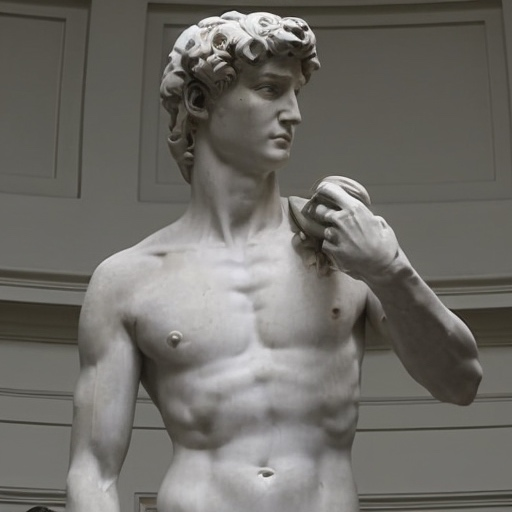

In [3]:
image = PIL.Image.open("./example.jpg")
image = PIL.ImageOps.exif_transpose(image)
image = image.convert("RGB")
image

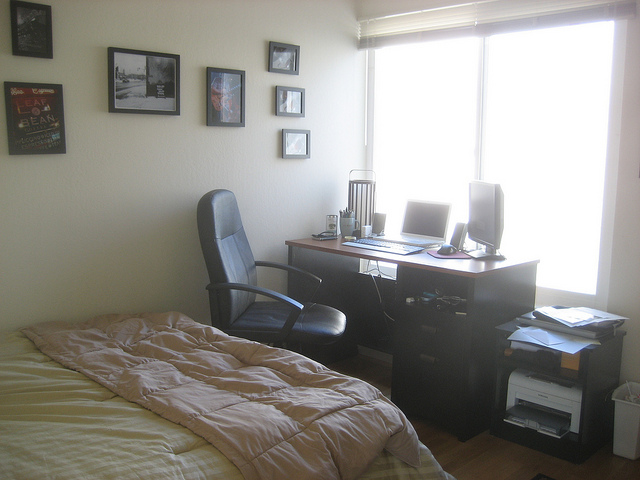

In [5]:
image = PIL.Image.open("./COCO_val2014_000000262162.jpg")
image = PIL.ImageOps.exif_transpose(image)
image = image.convert("RGB")
image

  0%|          | 0/20 [00:00<?, ?it/s]

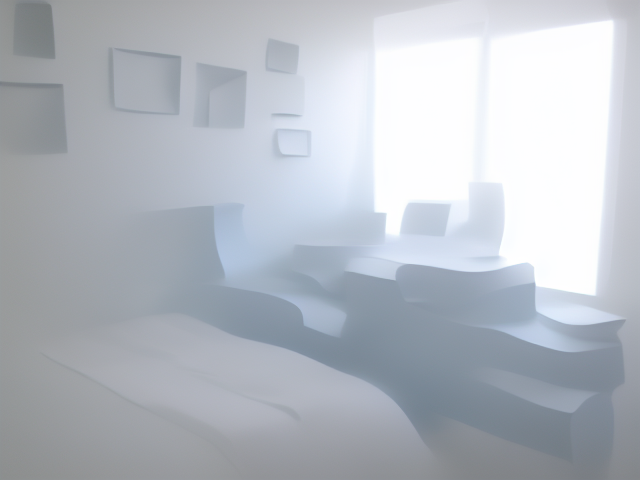

In [10]:
prompt = "Enhance resolution with slight texture and lighting changes"
# prompt = "Zoomed-in variant with mild perspective distortion"
# prompt = "Stylized version with smooth shading and soft edges"
# prompt = "A slightly different angle of the scene, as if captured from a nearby viewpoint, maintaining the same objects but with minor positional variations."
pipe(prompt, image=image, num_inference_steps=20, image_guidance_scale=1).images[0]

In [ ]:
#@title Gradio Demo
from __future__ import annotations

import math
import random

import gradio as gr
import torch
from PIL import Image, ImageOps
from diffusers import StableDiffusionInstructPix2PixPipeline


help_text = """
If you're not getting what you want, there may be a few reasons:
1. Is the image not changing enough? Your Image CFG weight may be too high. This value dictates how similar the output should be to the input. It's possible your edit requires larger changes from the original image, and your Image CFG weight isn't allowing that. Alternatively, your Text CFG weight may be too low. This value dictates how much to listen to the text instruction. The default Image CFG of 1.5 and Text CFG of 7.5 are a good starting point, but aren't necessarily optimal for each edit. Try:
    * Decreasing the Image CFG weight, or
    * Increasing the Text CFG weight, or
2. Conversely, is the image changing too much, such that the details in the original image aren't preserved? Try:
    * Increasing the Image CFG weight, or
    * Decreasing the Text CFG weight
3. Try generating results with different random seeds by setting "Randomize Seed" and running generation multiple times. You can also try setting "Randomize CFG" to sample new Text CFG and Image CFG values each time.
4. Rephrasing the instruction sometimes improves results (e.g., "turn him into a dog" vs. "make him a dog" vs. "as a dog").
5. Increasing the number of steps sometimes improves results.
6. Do faces look weird? The Stable Diffusion autoencoder has a hard time with faces that are small in the image. Try:
    * Cropping the image so the face takes up a larger portion of the frame.
"""


example_instructions = [
    "Make it a picasso painting",
    "as if it were by modigliani",
    "convert to a bronze statue",
    "Turn it into an anime.",
    "have it look like a graphic novel",
    "make him gain weight",
    "what would he look like bald?",
    "Have him smile",
    "Put him in a cocktail party.",
    "move him at the beach.",
    "add dramatic lighting",
    "Convert to black and white",
    "What if it were snowing?",
    "Give him a leather jacket",
    "Turn him into a cyborg!",
    "make him wear a beanie",
]

model_id = "timbrooks/instruct-pix2pix"

def main():
    pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", safety_checker=None).to("cuda")
    example_image = Image.open("./example.jpg").convert("RGB")

    def load_example(
        steps: int,
        randomize_seed: bool,
        seed: int,
        randomize_cfg: bool,
        text_cfg_scale: float,
        image_cfg_scale: float,
    ):
        example_instruction = random.choice(example_instructions)
        return [example_image, example_instruction] + generate(
            example_image,
            example_instruction,
            steps,
            randomize_seed,
            seed,
            randomize_cfg,
            text_cfg_scale,
            image_cfg_scale,
        )

    def generate(
        input_image: Image.Image,
        instruction: str,
        steps: int,
        randomize_seed: bool,
        seed: int,
        randomize_cfg: bool,
        text_cfg_scale: float,
        image_cfg_scale: float,
    ):
        seed = random.randint(0, 100000) if randomize_seed else seed
        text_cfg_scale = round(random.uniform(6.0, 9.0), ndigits=2) if randomize_cfg else text_cfg_scale
        image_cfg_scale = round(random.uniform(1.2, 1.8), ndigits=2) if randomize_cfg else image_cfg_scale

        width, height = input_image.size
        factor = 512 / max(width, height)
        factor = math.ceil(min(width, height) * factor / 64) * 64 / min(width, height)
        width = int((width * factor) // 64) * 64
        height = int((height * factor) // 64) * 64
        input_image = ImageOps.fit(input_image, (width, height))

        if instruction == "":
            return [input_image, seed]

        generator = torch.manual_seed(seed)
        edited_image = pipe(
            instruction, image=input_image,
            guidance_scale=text_cfg_scale, image_guidance_scale=image_cfg_scale,
            num_inference_steps=steps, generator=generator,
        ).images[0]
        return [seed, text_cfg_scale, image_cfg_scale, edited_image]

    def reset():
        return [0, "Randomize Seed", 1371, "Fix CFG", 7.5, 1.5, None]

    with gr.Blocks() as demo:
        with gr.Row():
            with gr.Column(scale=1, min_width=100):
                generate_button = gr.Button("Generate")
            with gr.Column(scale=1, min_width=100):
                load_button = gr.Button("Load Example")
            with gr.Column(scale=1, min_width=100):
                reset_button = gr.Button("Reset")
            with gr.Column(scale=3):
                instruction = gr.Textbox(lines=1, label="Edit Instruction", interactive=True)

        with gr.Row():
            input_image = gr.Image(label="Input Image", type="pil", interactive=True)
            edited_image = gr.Image(label=f"Edited Image", type="pil", interactive=False)
            input_image.style(height=512, width=512)
            edited_image.style(height=512, width=512)

        with gr.Row():
            steps = gr.Number(value=10, precision=0, label="Steps", interactive=True)
            randomize_seed = gr.Radio(
                ["Fix Seed", "Randomize Seed"],
                value="Randomize Seed",
                type="index",
                show_label=False,
                interactive=True,
            )
            seed = gr.Number(value=1371, precision=0, label="Seed", interactive=True)
            randomize_cfg = gr.Radio(
                ["Fix CFG", "Randomize CFG"],
                value="Fix CFG",
                type="index",
                show_label=False,
                interactive=True,
            )
            text_cfg_scale = gr.Number(value=7.5, label=f"Text CFG", interactive=True)
            image_cfg_scale = gr.Number(value=1.5, label=f"Image CFG", interactive=True)

        gr.Markdown(help_text)

        load_button.click(
            fn=load_example,
            inputs=[
                steps,
                randomize_seed,
                seed,
                randomize_cfg,
                text_cfg_scale,
                image_cfg_scale,
            ],
            outputs=[input_image, instruction, seed, text_cfg_scale, image_cfg_scale, edited_image],
        )
        generate_button.click(
            fn=generate,
            inputs=[
                input_image,
                instruction,
                steps,
                randomize_seed,
                seed,
                randomize_cfg,
                text_cfg_scale,
                image_cfg_scale,
            ],
            outputs=[seed, text_cfg_scale, image_cfg_scale, edited_image],
        )
        reset_button.click(
            fn=reset,
            inputs=[],
            outputs=[steps, randomize_seed, seed, randomize_cfg, text_cfg_scale, image_cfg_scale, edited_image],
        )

    demo.launch(share=True, debug=True)


if __name__ == "__main__":
    main()
